## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [34]:
import requests

# URL файла для скачивания
url = "https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip"

# Путь для сохранения скачанного файла
file_path = "data/lenta.txt.zip"

# Загрузка файла
response = requests.get(url)
with open(file_path, 'wb') as file:
    file.write(response.content)

!unzip -o data/lenta.txt.zip -d data/

Archive:  data/lenta.txt.zip
  inflating: data/lenta.txt          
  inflating: data/__MACOSX/._lenta.txt  


### Способ 1. 

In [145]:
# lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer
# добавить разбиение не предложения чтобы не считать биграмы по границам предложений
corpus = open('data/lenta.txt').read()
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
# результат это список списков 
tokenized_sentences[:2]

[['Бои',
  'у',
  'Сопоцкина',
  'и',
  'Друскеник',
  'закончились',
  'отступлением',
  'германцев',
  '.'],
 ['Неприятель',
  ',',
  'приблизившись',
  'с',
  'севера',
  'к',
  'Осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью',
  '.']]

In [146]:
import re
#удаление все кроме символов, чисел и нижних поджерниваний + к нижнему регистру
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] 
                       for sentence in tokenized_sentences]
tokenized_sentences[:2]

[['бои',
  'у',
  'сопоцкина',
  'и',
  'друскеник',
  'закончились',
  'отступлением',
  'германцев'],
 ['неприятель',
  'приблизившись',
  'с',
  'севера',
  'к',
  'осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью']]

In [37]:
from collections import Counter
def ngrammer(tokens, n=5):
    ngrams = []
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams
ngram_counts = Counter()
for sentence in tokenized_sentences:
    ngram_counts.update(ngrammer([token for token in sentence]))
ngram_counts.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('группировки войск на северном кавказе', 84),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('новости со ссылкой на пресс-службу', 76),
 ('эхо москвы со ссылкой на', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('по борьбе с организованной преступностью', 66),
 ('как сообщает итар-тасс со ссылкой', 58)]

### Способ 2. 

In [38]:
#lenta.txt -> word_tokene(preserve_line=True) - ngrammer
corpus = open('data/lenta.txt').read()
# Разбиваем текст на слова с сохранением разделителей строк
words = word_tokenize(corpus, preserve_line=True)
# Приводим слова к нижнему регистру и удаляем лишние символы
words = [token.lower() for token in words if not re.match('\W+', token)]
def ngrammer(tokens, n=5):
    ngrams = []
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams
ngram_counts = Counter()
for sentence in tokenized_sentences:
    ngram_counts.update(ngrammer([token for token in sentence]))
ngram_counts.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('группировки войск на северном кавказе', 84),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('новости со ссылкой на пресс-службу', 76),
 ('эхо москвы со ссылкой на', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('по борьбе с организованной преступностью', 66),
 ('как сообщает итар-тасс со ссылкой', 58)]

### Топ-20 наиболее частотных 5-грамм одинаковы для обоих способов

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2019)

Вставьте сюда скриншот
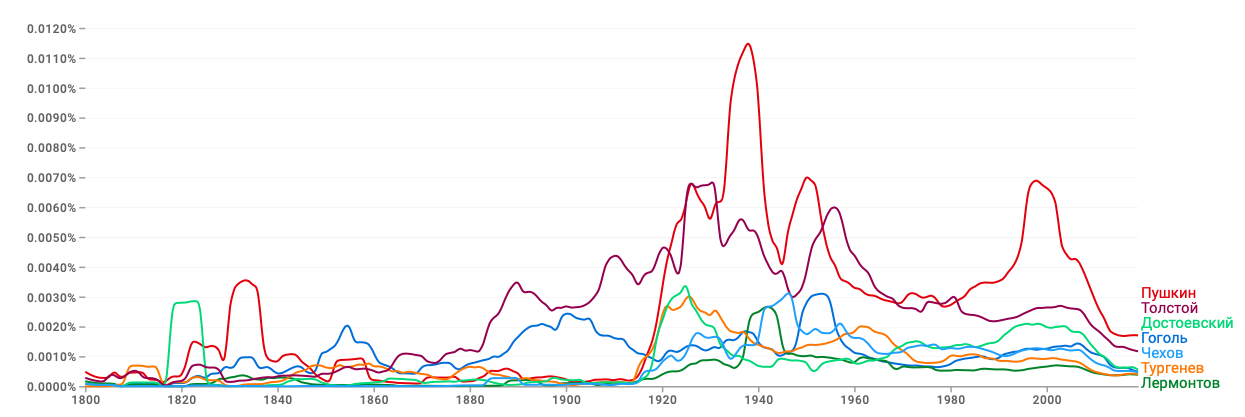


## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [15]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

### Способ 1 как на семинаре с помощью изначального scorer

In [79]:
def scorer(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        score = ((bigram_count - min_count) / ((word_count_a + word_count_b)))
    except ZeroDivisionError:
        return 0
    
    return score

# добавим стоп-слова сразу в нграммер для простоты
from nltk.corpus import stopwords

# преобразуем в set чтобы быстрее проверять наличие в этом списке стоп слов
russian_stopwords = set(stopwords.words('russian'))
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams
# добавим параметр min_count
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)
bigram2score = score_bigrams(unigrams, bigrams, scorer, min_count=20)
bigram2score.most_common(10)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.3657187993680885),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('чрезвычайным ситуациям', 0.30935251798561153)]

### Способ 2 с помощью обновленного scorer

In [83]:
import math

def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words):
    try:
        pmi = math.log2((bigram_count / total_words) / ((word_count_a / total_words) * (word_count_b / total_words)))
    except ZeroDivisionError:
        return 0
    return pmi

# преобразуем в set чтобы быстрее проверять наличие в этом списке стоп слов
russian_stopwords = set(stopwords.words('russian'))
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

def score_bigrams_pmi(unigrams, bigrams, total_words, min_count=0):
    bigram2score = Counter()

    for bigram, count in bigrams.items():
        word_a, word_b = bigram.split()
        score = scorer_pmi(unigrams[word_a], unigrams[word_b], count, total_words)

        if score > 0:  # Проверка на положительное значение PMI
            bigram2score[bigram] = score
                ## если метрика выше порога, добавляем в словарик

    return bigram2score



# Подсчитываем общее количество слов в корпусе
total_words = sum(unigrams.values())

# Рассчитываем PMI для всех биграммов
bigram2score_pmi = score_bigrams_pmi(unigrams, bigrams, total_words, min_count=20)

# Выводим топ-10 биграммов
bigram2score_pmi.most_common(10)


[('сопоцкина друскеник', 20.510568127854185),
 ('неприятель приблизившись', 20.510568127854185),
 ('саноку обстреливалась', 20.510568127854185),
 ('м.ю лермонтова', 20.510568127854185),
 ('австрийский аэроплан', 20.510568127854185),
 ('показывался аэроплан-птица', 20.510568127854185),
 ('das ist', 20.510568127854185),
 ('ist nesteroff', 20.510568127854185),
 ('песнь нестерове', 20.510568127854185),
 ('могучий унесся', 20.510568127854185)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [143]:
import math

def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words):
    if bigram_count == 0:
        return float('-inf')
    
    prob_bigram = bigram_count / total_words
    prob_word_a = word_count_a / total_words
    prob_word_b = word_count_b / total_words

    pmi = math.log2(prob_bigram) - (math.log2(prob_word_a) + math.log2(prob_word_b))
    
    return pmi

# преобразуем в set чтобы быстрее проверять наличие в этом списке стоп слов
russian_stopwords = set(stopwords.words('russian'))

def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0, len(tokens) - n + 1):
        ngrams.append(' '.join(tokens[i:i + n]))
    return ngrams

def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

def score_bigrams_pmi(unigrams, bigrams, total_words, min_count=0):
    bigram2score = Counter()

    for bigram, count in bigrams.items():
        word_a, word_b = bigram.split()
        pmi = scorer_pmi(unigrams[word_a], unigrams[word_b], count, total_words)

        if pmi > 0:  # Проверка на положительное значение PMI
            bigram2score[bigram] = pmi
            ## если метрика выше порога, добавляем в словарик

    return bigram2score

# Подсчитываем общее количество слов в корпусе
total_words = sum(unigrams.values())

# Рассчитываем PMI для всех биграммов
bigram2score_pmi = score_bigrams_pmi(unigrams, bigrams, total_words, min_count=20)

# Выводим топ-10 биграммов
bigram2score_pmi.most_common(10)


[('сопоцкина друскеник', 20.510568127854185),
 ('неприятель приблизившись', 20.510568127854185),
 ('саноку обстреливалась', 20.510568127854185),
 ('м.ю лермонтова', 20.510568127854185),
 ('австрийский аэроплан', 20.510568127854185),
 ('показывался аэроплан-птица', 20.510568127854185),
 ('das ist', 20.510568127854185),
 ('ist nesteroff', 20.510568127854185),
 ('песнь нестерове', 20.510568127854185),
 ('могучий унесся', 20.510568127854185)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [147]:
import gensim

def scorer_w2v(worda_count, wordb_count, bigram_count, corpus_word_count, len_vocab=0,  min_count=0):

    try:
        score = ((bigram_count - min_count) * corpus_word_count) / (worda_count * wordb_count)
    except ZeroDivisionError:
        return 0
    
    return score
ph = gensim.models.Phrases(tokenized_sentences, 
                           min_count=1, 
                           threshold=1.,
                           scoring=scorer_w2v)
p = gensim.models.phrases.Phraser(ph)
ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1., scoring=scorer_w2v)
p2 = gensim.models.phrases.Phraser(ph2)
p2[p[tokenized_sentences[10]]]



['русский_инвалид_16_сентября',
 '1914',
 'года.министерство',
 'народного',
 'просвещения',
 'в_виду',
 'происходящих',
 'чрезвычайных',
 'событий',
 'признало',
 'соответственным',
 'в_день',
 'годовщины_со_дня_рождения',
 'м.ю',
 'лермонтова',
 '2-го',
 'октября',
 '1914_года',
 'ограничиться',
 'совершением',
 'в_учебных',
 'заведениях',
 'панихиды_по',
 'поэту',
 'отложив',
 'празднование',
 'юбилея',
 'до',
 'более',
 'благоприятного',
 'времени']